In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt


In [32]:
mnist = loadmat("./dataset/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [33]:
mnist_data.shape,mnist_label.shape

((70000, 784), (70000,))

In [34]:
mnist_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [35]:
np.unique(mnist_label)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [36]:
X=mnist_data/255
y=mnist_label
y=y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def show(input,target,ind):
    image = input[ind].reshape(28, 28) 
    print(target[ind])
    plt.imshow(image, cmap='gray')
    plt.show()


In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [40]:
input_size = 784  # 28x28 pixels
hidden_layer_1_size = 32
hidden_layer_2_size = 16
hidden_layer_3_size = 16
hidden_layer_4_size = 32
output_size = 10  # 10 classes (digits 0-9)

np.random.seed(32)

W1 = np.random.randn(hidden_layer_1_size,input_size)  # Input to hidden layer 1  16 x 784
b1 = np.zeros(( hidden_layer_1_size,1))  # 16 x 1

W2 = np.random.randn(hidden_layer_2_size,hidden_layer_1_size)  # Hidden layer 1 to hidden layer 2  16 x 16
b2 = np.zeros((hidden_layer_2_size,1))  # 16 x 1

W3= np.random.randn(hidden_layer_3_size,hidden_layer_2_size)  # Hidden layer 2 to hidden layer 3  16 x 16
b3 = np.zeros((hidden_layer_3_size,1))  # 16 x 1

W4 = np.random.randn(hidden_layer_4_size,hidden_layer_3_size)  # Hidden layer 3 to hidden layer 4  16 x 16
b4 = np.zeros((hidden_layer_4_size,1))  # 16 x 1

W5 = np.random.randn(output_size,hidden_layer_4_size)  # Hidden layer 2 to output   10 x 16
b5 = np.zeros((output_size,1))  # 10 x 1


In [41]:
def forward(X):
  
    activations=[]
    # Input Layer ->  Hidden Layer 1
    Z1 = np.dot(W1,X) + b1          # 16 x 784 * 784 x 1 = 16 x 1
    A1 = sigmoid(Z1)                # 16 x 1

    # Hidden Layer 1 -> Hidden Layer 2
    Z2 = np.dot(W2,A1) + b2         # 16 x 16 * 16 x 1 = 16 x 1
    A2 = sigmoid(Z2)                # 16 x 1

    # Hidden Layer 2 -> Hidden Layer 3
    Z3 = np.dot(W3,A2) + b3         # 16 x 16 * 16 x 1 = 16 x 1
    A3 = sigmoid(Z3)                # 16 x 1
    
    # Hidden Layer 3 -> Hidden Layer 4
    Z4 = np.dot(W4,A3) + b4         # 16 x 16 * 16 x 1 = 16 x 1
    A4 = sigmoid(Z4)                # 16 x 1
    
    # Hidden Layer 4 -> Output Layer
    Z5 = np.dot(W5,A4) + b5         # 10 x 16 * 16 x 1 = 10 x 1
    A5 = sigmoid(Z5)                # 10 x 1
    
    activations.extend((A1,A2,A3,A4,A5))
    return activations



<!-- def backprop(X, y,activations):
    m = X.shape[1]
    y_onehot = np.zeros((m, output_size))
    y_onehot[np.arange(m), y] = 1
    
    A1,A2,A3,A4,A5=activations
    
    weights=[]
    bias=[]

    # Output layer error
    dZ5 = A5.T - y_onehot
    dW5 = np.dot(A2, dZ5) / m
    db5 = np.sum(dZ5, axis=0, keepdims=True) / m

    # Hidden layer 4 error
    dA4 = np.dot(dZ5, W5)
    dZ4 = dA4 * sigmoid_derivative(A4.T)
    dW4 = np.dot(A3, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m
    
    # Hidden layer 3 error
    dA3 = np.dot(dZ4, W4)
    dZ3 = dA3 * sigmoid_derivative(A3.T)
    dW3 = np.dot(A2, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Hidden layer 2 error
    dA2 = np.dot(dZ3, W3)
    dZ2 = dA2 * sigmoid_derivative(A2.T)
    dW2 = np.dot(A1, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer 1 error
    dA1 = np.dot(dZ2, W2)
    dZ1 = dA1 * sigmoid_derivative(A1.T)
    dW1 = np.dot(X, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    
    weights.extend((dW1,dW2,dW3,dW4,dW5))
    bias.extend((db1,db2,db3,db4,db5))
    

    return weights,bias -->


In [42]:
def backprop(X, y, activations):
    m = X.shape[1]
    y_onehot = np.zeros((y.size, output_size))
    y_onehot[np.arange(y.size), y] = 1
    
    A1, A2, A3, A4, A5 = activations
    
    weights = []
    bias = []

    # Output layer error
    dZ5 = A5 - y_onehot.T
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m

    # Hidden layer 4 error
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * sigmoid_derivative(A4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    
    # Hidden layer 3 error
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * sigmoid_derivative(A3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m

    # Hidden layer 2 error
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Hidden layer 1 error
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    weights.extend((dW1, dW2, dW3, dW4, dW5))
    bias.extend((db1, db2, db3, db4, db5))
    
    return weights, bias


In [43]:
def update_parameters(weights,bias,lr):
    global W1, b1, W2, b2, W3, b3, W4, b4, W5, b5
    
    dW1,dW2,dW3,dW4,dW5=weights
    db1,db2,db3,db4,db5=bias
    

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    W4 -= lr * dW4
    b4 -= lr * db4
    W5 -= lr * dW5
    b5 -= lr * db5
    


In [44]:
from tqdm import tqdm

cost=[]

def train(X_train, y_train, epochs=100,batch_size=32, learning_rate=0.01):
    
    m=X_train.shape[0]
    for epoch in tqdm(range(epochs)):
        
        indices = np.random.permutation(m)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(0, m, batch_size):

            X_batch = X_train_shuffled[i:i+batch_size].T  # 784 x batch_size
            y_batch = y_train_shuffled[i:i+batch_size]    # batch_size
            
         
            activations = forward(X_batch)  
            '''Size of A1 = 16 x batch_size,
            A2 = 16 x batch_size, 
            A3 = 10 x batch_size'''

            
            weights,bias = backprop(X_batch, y_batch,activations)

            
            update_parameters(weights,bias, learning_rate)

        if epoch % 10 == 0:
            loss = np.mean(np.square(activations[-1] - (np.eye(output_size)[y_batch]).T)) 
            cost.append((epoch,loss))
            print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {1-loss}")


In [45]:
def predict(X):
    activations= forward(X)
    return np.argmax(activations[-1], axis=0)

In [46]:
train(X_train, y_train, epochs=100, batch_size=64,learning_rate=0.01)

  1%|          | 1/100 [00:00<01:00,  1.63it/s]

Epoch 0, Loss: 0.08868471732081737, Accuracy: 0.9113152826791826


 11%|█         | 11/100 [00:06<00:49,  1.78it/s]

Epoch 10, Loss: 0.07111818427624882, Accuracy: 0.9288818157237512


 21%|██        | 21/100 [00:12<00:47,  1.68it/s]

Epoch 20, Loss: 0.04205561646524071, Accuracy: 0.9579443835347593


 31%|███       | 31/100 [00:17<00:39,  1.75it/s]

Epoch 30, Loss: 0.03564673183232142, Accuracy: 0.9643532681676785


 41%|████      | 41/100 [00:23<00:33,  1.74it/s]

Epoch 40, Loss: 0.03331755647762584, Accuracy: 0.9666824435223742


 51%|█████     | 51/100 [00:29<00:26,  1.85it/s]

Epoch 50, Loss: 0.03601493126908543, Accuracy: 0.9639850687309146


 61%|██████    | 61/100 [00:34<00:20,  1.86it/s]

Epoch 60, Loss: 0.024526440813997498, Accuracy: 0.9754735591860025


 71%|███████   | 71/100 [00:40<00:15,  1.86it/s]

Epoch 70, Loss: 0.014835379545554375, Accuracy: 0.9851646204544456


 81%|████████  | 81/100 [00:45<00:10,  1.83it/s]

Epoch 80, Loss: 0.01556355349650695, Accuracy: 0.984436446503493


 91%|█████████ | 91/100 [00:51<00:04,  1.82it/s]

Epoch 90, Loss: 0.014960573083999534, Accuracy: 0.9850394269160004


100%|██████████| 100/100 [00:56<00:00,  1.79it/s]


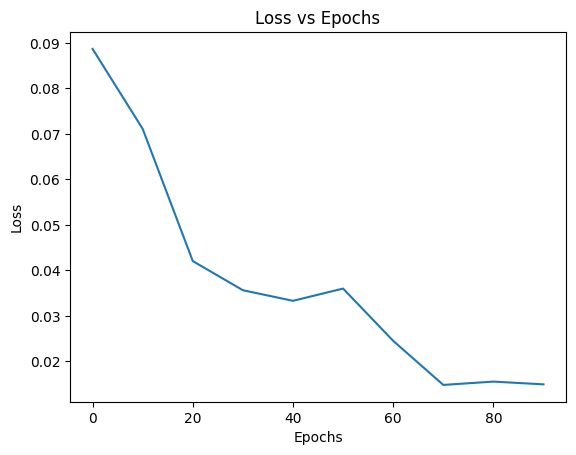

In [47]:
plt.plot(*zip(*cost))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs') 
plt.show()


In [48]:
no_of_params= W1.size + b1.size + W2.size + b2.size + W3.size + b3.size + W4.size + b4.size + W5.size + b5.size
no_of_params

26794

In [49]:

y_pred = predict(X_train.T)
# Train accuracy
accuracy = np.mean(y_pred == y_train) * 100
print(f"Train Accuracy: {accuracy:.2f}%")

Train Accuracy: 88.98%


3


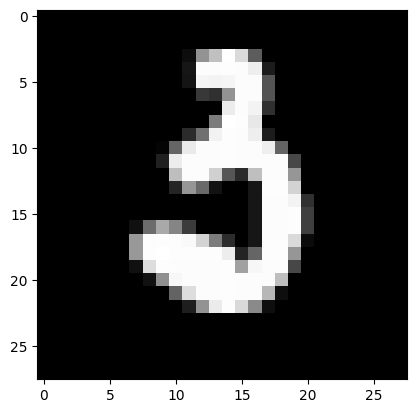

In [50]:
show(X_train,y_train,8)


In [51]:
print(y_pred[:10])
print(y_train[:10])

mismatches = np.where(y_pred != y_train)[0]
print(f"Number of mismatches: {len(mismatches)}")
for idx in mismatches:
    print(f"Index {idx}: Predicted={y_pred[idx]}, Actual={y_train[idx]}")

[7 7 1 5 0 3 4 9 6 4]
[7 7 1 5 0 3 4 9 3 4]
Number of mismatches: 6172
Index 8: Predicted=6, Actual=3
Index 31: Predicted=4, Actual=9
Index 48: Predicted=2, Actual=4
Index 61: Predicted=5, Actual=8
Index 66: Predicted=6, Actual=0
Index 71: Predicted=4, Actual=9
Index 81: Predicted=2, Actual=3
Index 84: Predicted=3, Actual=7
Index 86: Predicted=7, Actual=5
Index 95: Predicted=5, Actual=3
Index 99: Predicted=2, Actual=7
Index 115: Predicted=5, Actual=3
Index 118: Predicted=2, Actual=3
Index 119: Predicted=5, Actual=9
Index 147: Predicted=7, Actual=9
Index 148: Predicted=5, Actual=8
Index 164: Predicted=5, Actual=0
Index 166: Predicted=1, Actual=3
Index 167: Predicted=6, Actual=2
Index 184: Predicted=0, Actual=6
Index 203: Predicted=7, Actual=2
Index 208: Predicted=7, Actual=9
Index 225: Predicted=4, Actual=6
Index 228: Predicted=5, Actual=8
Index 238: Predicted=3, Actual=5
Index 256: Predicted=8, Actual=2
Index 262: Predicted=9, Actual=8
Index 263: Predicted=0, Actual=4
Index 269: Predic

7


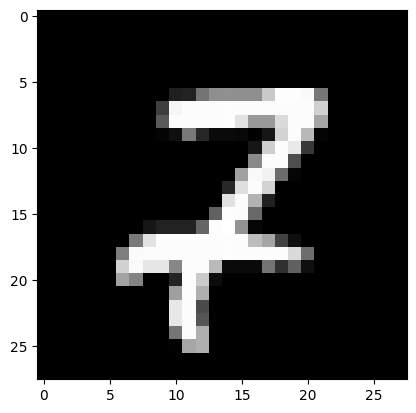

In [52]:
show(X_train,y_train,99)

3


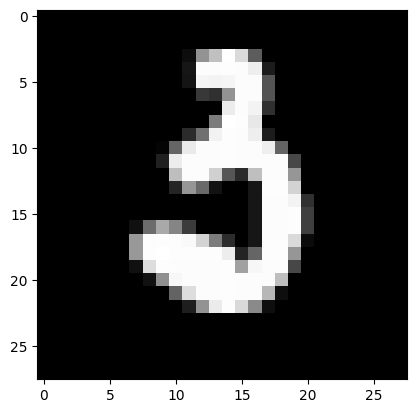

In [53]:


show(X_train,y_train,8)

In [54]:
y_pred = predict(X_test.T)

print(y_pred[:10])
print(y_test[:10])

accuracy = np.mean(y_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

[7 8 6 5 7 1 3 3 0 9]
[7 8 6 5 7 1 3 3 0 9]
Test Accuracy: 88.19%


4


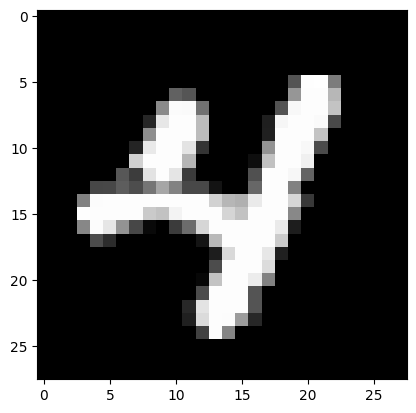

In [55]:
show(X_test,y_test,10)

In [56]:

def inference_output(input,target,ind):
    show(input,target,ind)
    digit = predict(input[ind:].T)
    print(f"The Actual image is digit {target[ind]}")
    print(f"The Predicted image is digit {digit[0]}")



4


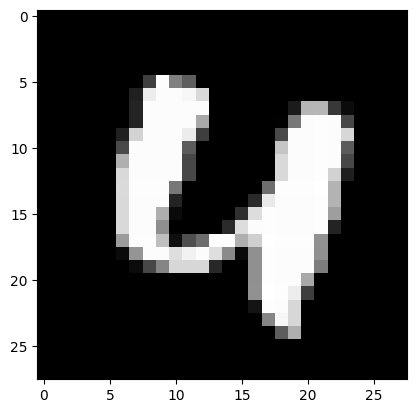

The Actual image is digit 4
The Predicted image is digit 4


In [57]:
inference_output(X_train,y_train,186)

In [58]:
'''def backprop(X, y,activations):
    m = X.shape[1]
    y_onehot = np.zeros((m, output_size))
    y_onehot[np.arange(m), y] = 1
    
    A1,A2,A3,A4,A5=activations
    
    weights=[]
    bias=[]

    # Output layer error
    dZ5 = A5.T - y_onehot
    dW5 = np.dot(A2, dZ5) / m
    db5 = np.sum(dZ5, axis=0, keepdims=True) / m

    # Hidden layer 4 error
    dA4 = np.dot(dZ5, W5)
    dZ4 = dA4 * sigmoid_derivative(A4.T)
    dW4 = np.dot(A3, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m
    
    # Hidden layer 3 error
    dA3 = np.dot(dZ4, W4)
    dZ3 = dA3 * sigmoid_derivative(A3.T)
    dW3 = np.dot(A2, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Hidden layer 2 error
    dA2 = np.dot(dZ3, W3)
    dZ2 = dA2 * sigmoid_derivative(A2.T)
    dW2 = np.dot(A1, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer 1 error
    dA1 = np.dot(dZ2, W2)
    dZ1 = dA1 * sigmoid_derivative(A1.T)
    dW1 = np.dot(X, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    
    weights.extend((dW1,dW2,dW3,dW4,dW5))
    bias.extend((db1,db2,db3,db4,db5))
    

    return weights,bias
'''


'def backprop(X, y,activations):\n    m = X.shape[1]\n    y_onehot = np.zeros((m, output_size))\n    y_onehot[np.arange(m), y] = 1\n    \n    A1,A2,A3,A4,A5=activations\n    \n    weights=[]\n    bias=[]\n\n    # Output layer error\n    dZ5 = A5.T - y_onehot\n    dW5 = np.dot(A2, dZ5) / m\n    db5 = np.sum(dZ5, axis=0, keepdims=True) / m\n\n    # Hidden layer 4 error\n    dA4 = np.dot(dZ5, W5)\n    dZ4 = dA4 * sigmoid_derivative(A4.T)\n    dW4 = np.dot(A3, dZ4) / m\n    db4 = np.sum(dZ4, axis=0, keepdims=True) / m\n    \n    # Hidden layer 3 error\n    dA3 = np.dot(dZ4, W4)\n    dZ3 = dA3 * sigmoid_derivative(A3.T)\n    dW3 = np.dot(A2, dZ3) / m\n    db3 = np.sum(dZ3, axis=0, keepdims=True) / m\n\n    # Hidden layer 2 error\n    dA2 = np.dot(dZ3, W3)\n    dZ2 = dA2 * sigmoid_derivative(A2.T)\n    dW2 = np.dot(A1, dZ2) / m\n    db2 = np.sum(dZ2, axis=0, keepdims=True) / m\n\n    # Hidden layer 1 error\n    dA1 = np.dot(dZ2, W2)\n    dZ1 = dA1 * sigmoid_derivative(A1.T)\n    dW1 = np.dot